# Learning as inference

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
#import pymc as pm
#import arviz as az
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import warnings
import random
warnings.filterwarnings("ignore")

<b> Problem 6.1<b> 

We build on the case study of inferring a Bernoulli probability in Section 6.2. We noted that the probability of rain the next day was given by the posterior mean estimate, and was different from the most probable value of the rainfall rate, r, on the island, which is the MAP
estimate.

a) Suppose you have been on the island for 4 days, and it has rained only once. Show that the
MAP estimate for r is 0.25 and, according to Laplace’s rule of succession (Eq. (6.14)), the
posterior mean estimate is 0.33.

b) Explain intuitively why it makes sense that your estimate for the probability of rain the next
day is different from (and, in this case, greater than) your estimate of the most probable
rainfall rate.

c) Verify Eq. (6.14) numerically, by discretizing r into several hundred or thousand values
equally spaced between 0 and 1. Given 1 rainy day out of 4, calculate the likelihood for each
r value, and enter these into Bayes’ formula with a uniform prior. Calculate the posterior
mean as ∑rp(r|x).

In [5]:
#part a
n_rain = 1
t = 4
r_pm = (n_rain+1)/(t + 2)
r_map = n_rain/t
estimate = [r_pm, r_map]
estimate

[0.3333333333333333, 0.25]

part b

One could explain this by describing the difference between mean and mode. PME is the mean of posterior, and MAP is the mode of the posterior.
Second, the rainfall rate does not change over a long period of time (our assumption), but posterior mean estimate depends on the samples or observations.

In [103]:
# Part c
dry = 3  # Number of dry days
rain = 1  # Number of rainy days
r_values = np.linspace(0, 1, 1000)
likelihood = (r_values**rain)*((1 - r_values)**dry)
prior = np.ones_like(r_values)
posterior = likelihood*prior/ np.trapz((likelihood*prior), r_values)

In [105]:
posterior_mean = np.trapz(r_values * posterior, r_values)
posterior_mean

0.3333338900020407

<b> Problem 6.3 <b>

We start with Eq. (6.8) for the posterior over r in the island case study.

a) Write down an expression for the posterior over r if you observe only rain days.

b) Plot this posterior for nrain = 1,2,5,10 (four curves in the same plot).

c) How long would it take to convince you that the posterior mean of r is greater than 90%?

p_m for 1 is 0.16666666666666666
p_m for 2 is 0.25
p_m for 5 is 0.5
p_m for 10 is 0.9166666666666666


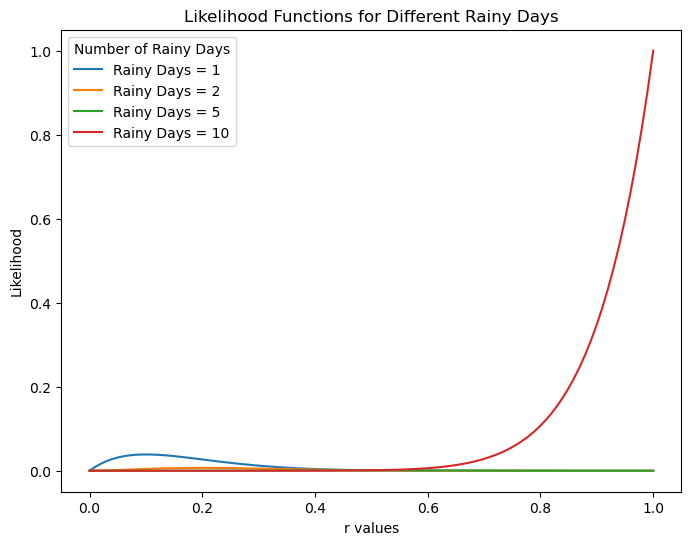

In [188]:
rain_day = [1,2,5,10]
n = 10
r_values = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
for i in range(len(rain_day)):
    liklihood = (r_values**rain_day[i]) * ((1 - r_values)**(n -rain_day[i]))
    p_m = (rain_day[i]+1)/(n + 2)
    print(f'p_m for {rain_day[i]} is {p_m}')
    sns.lineplot(x=r_values, y=liklihood, label=f'Rainy Days = {rain_day[i]}')

plt.title('Likelihood Functions for Different Rainy Days')
plt.xlabel('r values')
plt.ylabel('Likelihood')
plt.legend(title='Number of Rainy Days')
plt.grid(False)
plt.show()

<b> Problem 6.4 <b> 
This problem builds on Sections 5.5 and 6.3. Evidence accumulation can be formulated as a learning rule.

a) Show through a mathematical derivation that the posterior mean estimate can be written
recursively as $s\hat t+1 = sˆ+λt+1(xt+1 − sˆt)$, and find an expression for the “learning rate” λt in
terms of σ and t.

b) Does the learning rate increase or decrease as time goes by? Explain intuitively why this
makes sense.

c) Generalize (a) and (b) to the situation where each measurement xt has its own variance σt2.

1. **Prior Distribution**: Let's assume the prior distribution p(s) is Gaussian with mean mu_t and variance  \sigma_t^2.

$ p(s) \sim \mathcal{N}(\mu_t, \sigma_t^2) $

$p(x_{t+1} | s) \sim \mathcal{N}(s, \sigma^2)$

updated mean : is given by the weighted average of the prior mean $mu_t$ and the new measurement $x_{t+1}$:

$\mu_{t+1} = \mu_t + \lambda_{t+1} (x_{t+1} - \mu_t)$

2. **Learning Rate $\lambda_{t+1}$**: The learning rate can be derived from the variances. It is the proportion of the new measurement variance to the total variance.

$\lambda_{t+1} = \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}$

Now, we need to update the variance $\sigma_{t+1}^2$ :

$\sigma_{t+1}^2 = \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma^2} \right)^{-1}$

3. **Recursive Posterior Mean Estimate**:

$\hat{s}_{t+1} = \hat{s}_t + \lambda_{t+1} (x_{t+1} - \hat{s}_t)$

6. **Expression for  $\lambda_t \$**: From the above equation,

$\lambda_{t+1} = \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}$

$\hat{s}_{t+1} = \hat{s}_t + \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}(x_{t+1} - \hat{s}_t)$



Posterior means: [0, 2.5, 2.888888888888889, 3.0823529411764703, 3.131805157593123, 3.1783741120757694]
Posterior variances: [1, 0.5, 0.4444444444444444, 0.4235294117647059, 0.41260744985673353, 0.40590821964144774]
Learning rate: [0.01623632878565791, 0.5, 0.1111111111111111, 0.047058823529411764, 0.025787965616045846, 0.01623632878565791]


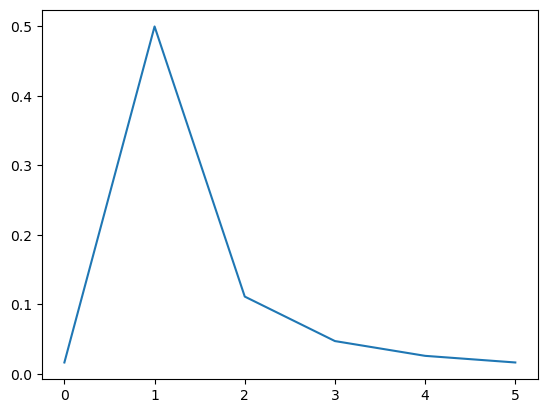

In [295]:
#PART b
mu = 0  # Initial mean
sigma = 1  # Initial variance

# Measurement variances (can be different for each measurement)
measurement_variances = [1, 2, 3, 4, 5]  # Example variances
measurements_rainy = [5, 6, 7, 6, 5]  # Example measurements

# Initialize lists to store posterior means and variances
posterior_means = [mu]
posterior_variances = [sigma]
Learning_rate = [lambda_t]

# Recursive Bayesian update
for t, (xt, sigma_t) in enumerate(zip(measurements, measurement_variances)):
    lambda_t = posterior_variances[-1] / (posterior_variances[-1] + sigma_t**2)
    mu_t = posterior_means[-1] + lambda_t * (xt - posterior_means[-1])
    sigma_t = (1 / (1 / posterior_variances[-1] + 1 / sigma_t**2))
    
    
    posterior_means.append(mu_t)
    posterior_variances.append(sigma_t)
    Learning_rate.append(lambda_t)


sns.lineplot(Learning_rate)
print("Posterior means:", posterior_means)
print("Posterior variances:", posterior_variances)
print("Learning rate:", Learning_rate)

**Part b**

The learning rate $ \lambda_t $ decreases as time goes by. This is because as more measurements are taken, the variance of the posterior distribution $ \sigma_t^2 $ decreases. Intuitively, the more evidence we accumulate, the more confident we become in our estimate, thus the impact of each new measurement diminishes over time.